# China

---

## Basic Data (Import and Visualization)

### Start (Importing Libraries)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

### Read data and Plotting

In [2]:
df = pd.read_csv('/Users/abdul/Documents/Academics/Metnum/UTS/dataset/csv/china.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape

(65, 5)

In [4]:
df.columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df

,Confirmed,New,Deaths,Active
Date,,,,
2020-01-22,571,0,17,554
2020-01-23,830,259,25,771
2020-01-24,1287,457,41,1208
2020-01-25,1975,688,56,1870
2020-01-26,2744,769,80,2613
...,...,...,...,...
2020-03-22,81093,39,3270,5120
2020-03-23,81171,78,3277,4735
2020-03-24,81218,47,3281,4287


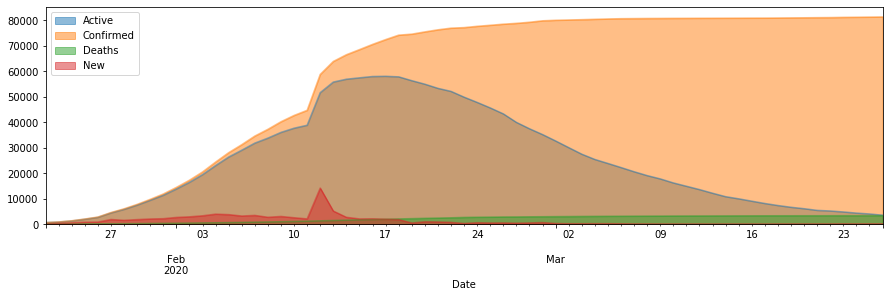

In [6]:
df.plot.area(y=["Active", "Confirmed", "Deaths", "New"], figsize=(15,4), alpha=0.5, subplots=False, stacked=False)

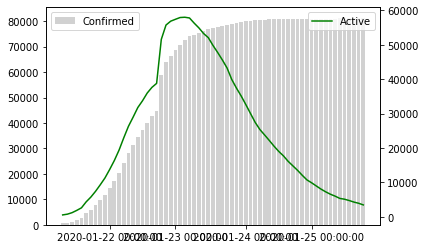

In [7]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["Confirmed"], color=(190/255,190/255,190/255,0.7), label='Confirmed')
ax2.plot(df.index, df["Active"], color='green', label='Active')
ax.set_xticklabels(df.index)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set_title('Banyak kasus aktif dibanding dengan total kasus')
fig.autofmt_xdate()

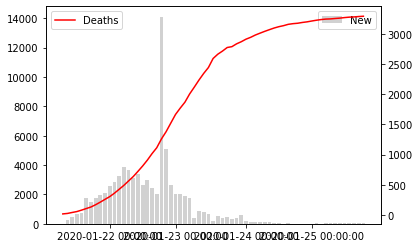

In [8]:
fig, ax3 = plt.subplots()
ax4 = ax3.twinx()
ax3.bar(df.index, df["New"], color=(190/255,190/255,190/255,0.7), label='New')
ax4.plot(df.index, df["Deaths"], color='red', label='Deaths')
ax3.set_xticklabels(df.index)
ax3.legend(loc='best')
ax4.legend(loc='best')
ax3.xaxis.grid(True)
ax4.yaxis.grid(True)
ax3.set_title('Banyak kasus kematian dibanding dengan kasus baru')
fig.autofmt_xdate()

## Regressions

### Active (Trend Naik)

- Start: 22-Jan-2020
- End: 17-Feb-2020
- Range: 27 Days

**Data**

In [9]:
y = np.array ((554, 771, 1208, 1870, 2613, 4349, 5739, 7417, 9308, 11289, 13748, 16369, 19383, 22942, 26302, 28985, 31774, 33738, 35982, 37626, 38791, 51591, 55748, 56873, 57416, 57934, 58016))
y = y.astype('float64')
y

array([  554.,   771.,  1208.,  1870.,  2613.,  4349.,  5739.,  7417.,
        9308., 11289., 13748., 16369., 19383., 22942., 26302., 28985.,
       31774., 33738., 35982., 37626., 38791., 51591., 55748., 56873.,
       57416., 57934., 58016.])

In [10]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

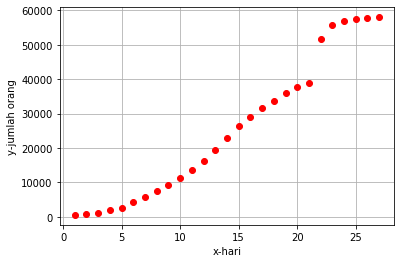

In [11]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

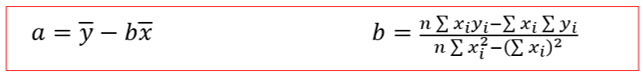

 **Membuat xreg untuk plotting selanjutnya**

In [12]:
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')

<b>Menghitung regresi linear</b>

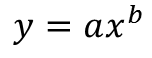

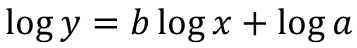

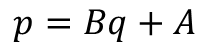

In [13]:
p = np.log10(y)
q = np.log10(x)
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [14]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 1.6592q + 2.4187


**Hitung kembali dalam bentuk bilangan berpangkat**

In [15]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 262.2287x^(1.6592)


**Hitung Koefisien Korelasi [r-square]**

In [16]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9894 dan r^2 = 0.9789


**Plot data dan perbandingan dengan hasil regresinya**

In [17]:
yreg = a*(xreg**b)

Text(0, 0.5, 'banyak kasus aktif')

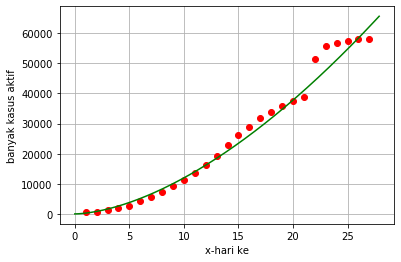

In [18]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('banyak kasus aktif')

**Selesai**

#### Regresi Eksponensial

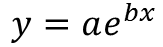

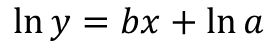

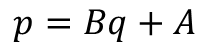

**Linearisasi**

In [19]:
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27.])

In [20]:
y

array([  554.,   771.,  1208.,  1870.,  2613.,  4349.,  5739.,  7417.,
        9308., 11289., 13748., 16369., 19383., 22942., 26302., 28985.,
       31774., 33738., 35982., 37626., 38791., 51591., 55748., 56873.,
       57416., 57934., 58016.])

In [21]:
p = np.log(y)
q = x

**Hitung regresi linear**

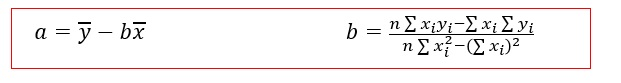

In [22]:
n = len(q)
pq = p*q
qq = q**2

In [23]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

0.16756689028354152

In [24]:
A = p.mean()-B*q.mean()
A

7.190413544807566

**Hasil persamaan linear**

In [25]:
print("p = {:.4f}q{:.4f}".format(B,A))

p = 0.1676q7.1904


**Hitung kembali dalam bentuk bilangan berpangkat**

In [26]:
a = np.e**A # A=log(a)
b = B

In [27]:
print("y = {:.4f}e^({:.4f}x)".format(a,b))

y = 1326.6517e^(0.1676x)


**Hitung Koefisien Korelasi [r-square]**

In [28]:
yDt = (y-y.mean())**2
yD = (y - a*(np.e**(b*x)))**2

In [29]:
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2

In [30]:
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,R2))

r = 0.5191 dan r^2 = 0.2695


**Plot data dan regresinya**

In [31]:
xreg = np.array(range(0,int (x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi

In [32]:
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'y')

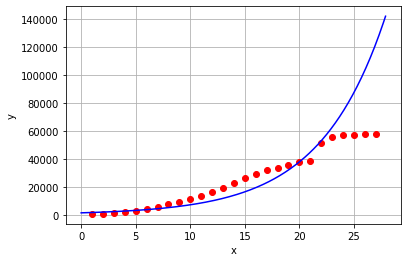

In [33]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Selesai**

#### Regresi Polinomial

In [34]:
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27.])

In [35]:
y

array([  554.,   771.,  1208.,  1870.,  2613.,  4349.,  5739.,  7417.,
        9308., 11289., 13748., 16369., 19383., 22942., 26302., 28985.,
       31774., 33738., 35982., 37626., 38791., 51591., 55748., 56873.,
       57416., 57934., 58016.])

**Membentuk regresi polinomial dari matriks**

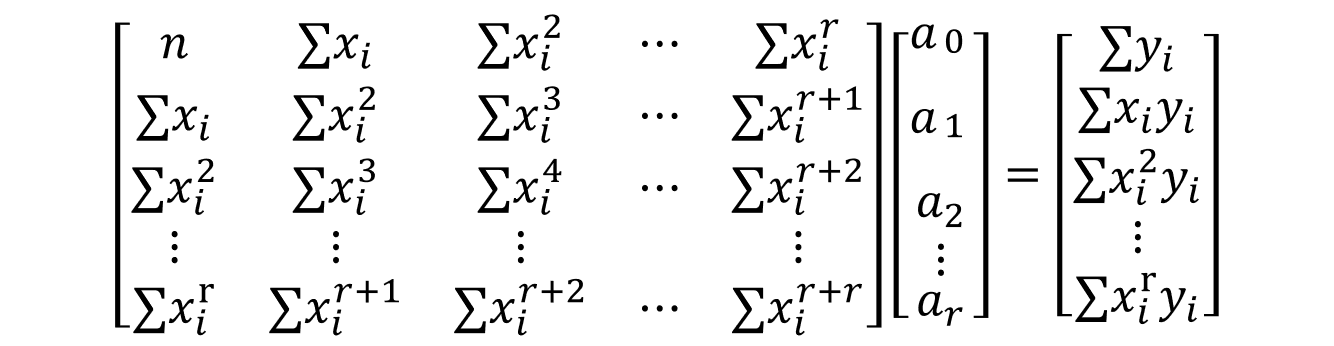

**Mendefinisikan elemen-elemen matriks kiri**

In [36]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[2.70000000e+01, 3.78000000e+02, 6.93000000e+03, 1.42884000e+05],
       [3.78000000e+02, 6.93000000e+03, 1.42884000e+05, 3.14206200e+06],
       [6.93000000e+03, 1.42884000e+05, 3.14206200e+06, 7.19659080e+07],
       [1.42884000e+05, 3.14206200e+06, 7.19659080e+07, 1.69521759e+09]])

**Mendefinisikan elemen-elemen matriks kanan**

In [37]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[6.88336000e+05],
       [1.38161480e+07],
       [2.97858342e+08],
       [6.71593768e+09]])

**Invers matriks sisi kiri**

In [38]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 7.92877493e-01, -2.15622032e-01,  1.56695157e-02,
        -3.32383666e-04],
       [-2.15622032e-01,  7.31260828e-02, -5.84373056e-03,
         1.30715744e-04],
       [ 1.56695157e-02, -5.84373056e-03,  4.94014287e-04,
        -1.14615057e-05],
       [-3.32383666e-04,  1.30715744e-04, -1.14615057e-05,
         2.72892993e-07]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [39]:
Y = Ainv.dot(B)
print(Y)

[[1728.18290599]
 [-824.72991032]
 [ 219.56384152]
 [  -3.97633363]]


In [40]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [41]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = -3.9763x^3 + 219.5638X^2 + -824.7299x + 1728.1829


In [42]:
y

array([  554.,   771.,  1208.,  1870.,  2613.,  4349.,  5739.,  7417.,
        9308., 11289., 13748., 16369., 19383., 22942., 26302., 28985.,
       31774., 33738., 35982., 37626., 38791., 51591., 55748., 56873.,
       57416., 57934., 58016.])

**Hitung Koefisien Korelasi [r-square] dan hasil regresi**

In [43]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('nilai r-square = ',R2)

nilai r-square =  0.9890381268571793


**Plot**

Text(0, 0.5, 'y')

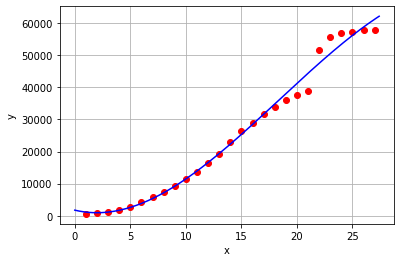

In [44]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

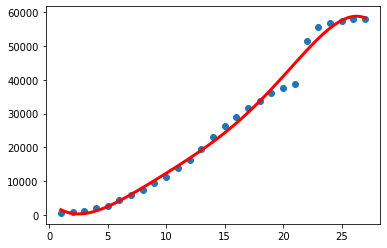

In [45]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, 27, 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [46]:
print (regpoly)

          5         4         3         2
-0.05217 x + 3.409 x - 82.14 x + 963.2 x - 3484 x + 4105


In [47]:
print(r2_score(y, regpoly(x)))

0.99174148057525


**Selesai**

### Active (Trend Turun)

- Start: 17-Feb-2020
- End: 26-Mar-2020
- Range: 39 Days

**Data**

In [141]:
y = np.array ((58016, 57805, 56301, 54921, 53284, 52093, 49824, 47765, 45600, 43258, 39919, 37414, 35129, 32616, 30004, 27423, 25353, 23784, 22179, 20533, 19016, 17721, 16136, 14831, 13524, 12088, 10733, 9893, 8967, 8056, 7263, 6569, 6013, 5353, 5120, 4735, 4287, 3947, 3460))
y = y.astype('float64')
y

array([58016., 57805., 56301., 54921., 53284., 52093., 49824., 47765.,
       45600., 43258., 39919., 37414., 35129., 32616., 30004., 27423.,
       25353., 23784., 22179., 20533., 19016., 17721., 16136., 14831.,
       13524., 12088., 10733.,  9893.,  8967.,  8056.,  7263.,  6569.,
        6013.,  5353.,  5120.,  4735.,  4287.,  3947.,  3460.])

In [142]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

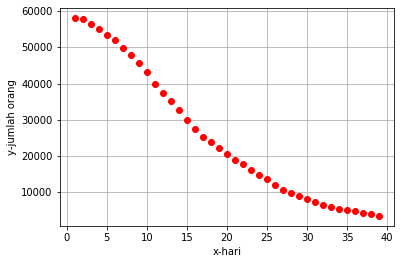

In [143]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [144]:
y = np.array ((58016, 57805, 56301, 54921, 53284, 52093, 49824, 47765, 45600, 43258, 39919, 37414, 35129, 32616, 30004, 27423, 25353, 23784, 22179, 20533, 19016, 17721, 16136, 14831, 13524, 12088, 10733, 9893, 8967, 8056, 7263, 6569, 6013, 5353, 5120, 4735, 4287, 3947, 3460))
y = y.astype('float64')
y

array([58016., 57805., 56301., 54921., 53284., 52093., 49824., 47765.,
       45600., 43258., 39919., 37414., 35129., 32616., 30004., 27423.,
       25353., 23784., 22179., 20533., 19016., 17721., 16136., 14831.,
       13524., 12088., 10733.,  9893.,  8967.,  8056.,  7263.,  6569.,
        6013.,  5353.,  5120.,  4735.,  4287.,  3947.,  3460.])

In [145]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.])

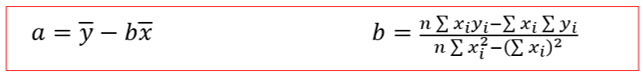

**Membuat xreg untuk plotting selanjutnya**

In [146]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

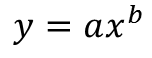

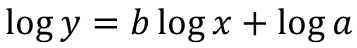

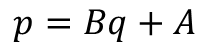

In [147]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [148]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [149]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = -0.8850q + 5.3088


**Kembalikan ke bentuk pangkat**

In [150]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 203612.7389x^(-0.8850)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [151]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.8556 dan r^2 = 0.7321


**Plot**

In [152]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([203612.73889645, 187143.21554736, 173273.73368931, 161424.58192892,
       151177.62641997, 142223.47215347, 134328.1352913 , 127311.29511298,
       121031.68088526, 115376.99966951, 110256.83698421, 105597.55277543,
       101338.54650322,  97429.48040703,  93828.18537078,  90499.0609406 ,
        87411.83833313,  84540.6136638 ,  81863.08480593,  79359.94343523,
        77014.38657298,  74811.72103603,  72739.04076669,  70784.96180931,
        68939.40323969,  67193.40499218,  65538.97551606,  63968.96370172,
        62476.95067231,  61057.1579285 ,  59704.36902745,  58413.86251992,
        57181.35429736,  56002.94784017,  54875.09112927,  53794.53919997,
        52758.32149263,  51763.71329661,  50808.21069949,  49889.50854867,
        49005.48100984,  48154.16437143,  47333.7417974 ,  46542.52977483,
        45778.96604011,  45041.59879845,  44329.07707735,  43640.14207724,
        42973.61940043,  42328.41205607,  41703.49415188,  41097.90519495,
        40510.74493415,  

Text(0, 0.5, 'y-banyak orang')

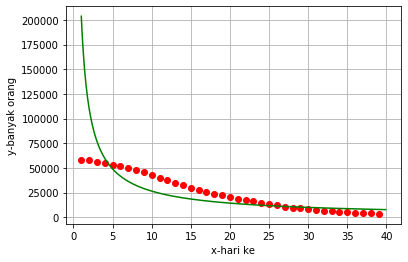

In [153]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

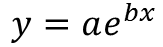

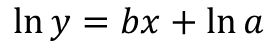

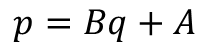

**Linearisasi**

In [61]:
y = np.array ((58016, 57805, 56301, 54921, 53284, 52093, 49824, 47765, 45600, 43258, 39919, 37414, 35129, 32616, 30004, 27423, 25353, 23784, 22179, 20533, 19016, 17721, 16136, 14831, 13524, 12088, 10733, 9893, 8967, 8056, 7263, 6569, 6013, 5353, 5120, 4735, 4287, 3947, 3460))
y = y.astype('float64')
y

array([58016., 57805., 56301., 54921., 53284., 52093., 49824., 47765.,
       45600., 43258., 39919., 37414., 35129., 32616., 30004., 27423.,
       25353., 23784., 22179., 20533., 19016., 17721., 16136., 14831.,
       13524., 12088., 10733.,  9893.,  8967.,  8056.,  7263.,  6569.,
        6013.,  5353.,  5120.,  4735.,  4287.,  3947.,  3460.])

In [62]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.])

In [63]:
p = np.log(y)
q = x

**Hitung regresi linear**

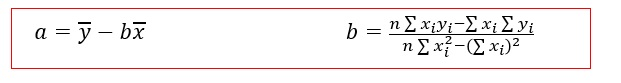

In [64]:
n = len(q)
pq = p*q
qq = q**2

In [65]:
B = (n*pq.sum()-q.sum()*p.sum())/(n*qq.sum()-(q.sum())**2)
B

-0.07835187543302591

In [66]:
A = p.mean()-B*q.mean()
A

11.371402094822034

**Hasil persamaan linear**

In [67]:
print("p = {:.4f}q{:.4f}".format(B,A))

p = -0.0784q11.3714


**Hitung kembali dalam bentuk bilangan berpangkat**

In [68]:
a = np.e**A # A=log(a)
b = B

In [69]:
print("y = {:.4f}e^({:.4f}x)".format(a,b))

y = 86803.4889e^(-0.0784x)


**Hitung Koefisien Korelasi [r-square]**

In [70]:
yDt = (y-y.mean())**2
yD = (y - a*(np.e**(b*x)))**2

In [71]:
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2

In [72]:
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,R2))

r = 0.9549 dan r^2 = 0.9119


**Plot data dan regresinya**

In [73]:
xreg = np.array(range(0,int (x[-1]+1)*10))
xreg = xreg/10 #memperhalus bentuk garis regresi

In [74]:
yreg = a*(np.e**(b*xreg))

Text(0, 0.5, 'y')

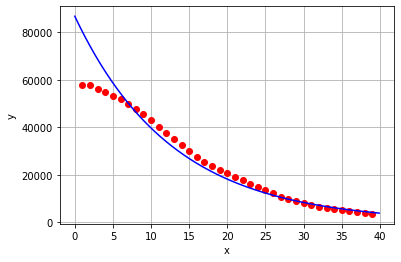

In [75]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Selesai**

#### Regresi Polinomial

In [127]:
y = np.array ((58016, 57805, 56301, 54921, 53284, 52093, 49824, 47765, 45600, 43258, 39919, 37414, 35129, 32616, 30004, 27423, 25353, 23784, 22179, 20533, 19016, 17721, 16136, 14831, 13524, 12088, 10733, 9893, 8967, 8056, 7263, 6569, 6013, 5353, 5120, 4735, 4287, 3947, 3460))
y = y.astype('float64')
y

array([58016., 57805., 56301., 54921., 53284., 52093., 49824., 47765.,
       45600., 43258., 39919., 37414., 35129., 32616., 30004., 27423.,
       25353., 23784., 22179., 20533., 19016., 17721., 16136., 14831.,
       13524., 12088., 10733.,  9893.,  8967.,  8056.,  7263.,  6569.,
        6013.,  5353.,  5120.,  4735.,  4287.,  3947.,  3460.])

In [128]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.])

**Membentuk regresi polinomial dari matriks**

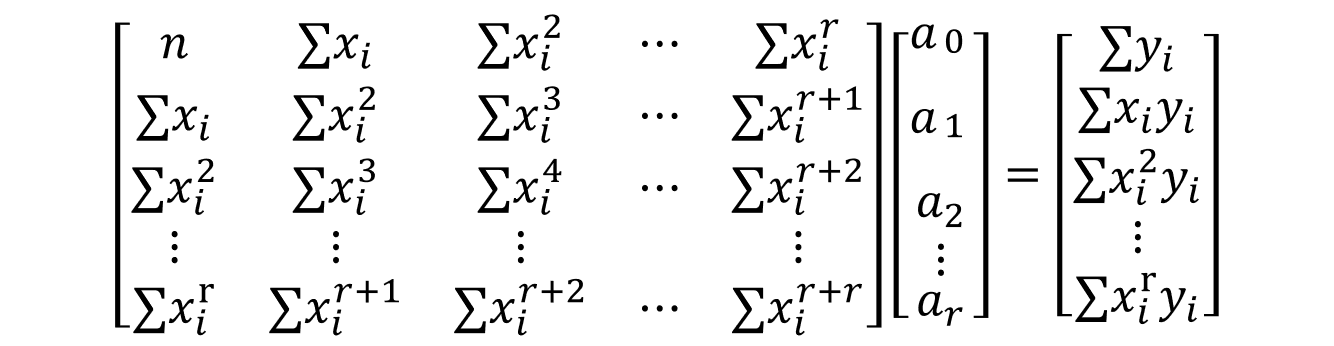

**Mendefinisikan elemen-elemen matriks kiri**

In [129]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[3.90000000e+01, 7.80000000e+02, 2.05400000e+04, 6.08400000e+05],
       [7.80000000e+02, 2.05400000e+04, 6.08400000e+05, 1.92213320e+07],
       [2.05400000e+04, 6.08400000e+05, 1.92213320e+07, 6.32533200e+08],
       [6.08400000e+05, 1.92213320e+07, 6.32533200e+08, 2.14089036e+10]])

**Mendefinisikan elemen-elemen matriks kanan**

In [130]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[9.90933000e+05],
       [1.19426120e+07],
       [2.22691196e+08],
       [5.21129615e+09]])

**Invers matriks sisi kiri**

In [131]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 5.00407290e-01, -9.48823317e-02,  4.80237322e-03,
        -7.09211236e-05],
       [-9.48823317e-02,  2.28686234e-02, -1.28127535e-03,
         2.00201848e-05],
       [ 4.80237322e-03, -1.28127535e-03,  7.61351852e-05,
        -1.23555964e-06],
       [-7.09211236e-05,  2.00201848e-05, -1.23555964e-06,
         2.05926607e-08]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [132]:
Y = Ainv.dot(B)
print(Y)

[[ 6.25824822e+04]
 [-1.90856618e+03]
 [-2.71760257e+01]
 [ 9.81415824e-01]]


In [133]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [134]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 0.9814x^3 + -27.1760X^2 + -1908.5662x + 62582.4822


In [135]:
y

array([58016., 57805., 56301., 54921., 53284., 52093., 49824., 47765.,
       45600., 43258., 39919., 37414., 35129., 32616., 30004., 27423.,
       25353., 23784., 22179., 20533., 19016., 17721., 16136., 14831.,
       13524., 12088., 10733.,  9893.,  8967.,  8056.,  7263.,  6569.,
        6013.,  5353.,  5120.,  4735.,  4287.,  3947.,  3460.])

**Hitung Koefisien Korelasi [r-square] dan hasil regresi**

In [136]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('nilai r-square = ',R2)

nilai r-square =  0.9969206775962449


**Plot**

Text(0, 0.5, 'y')

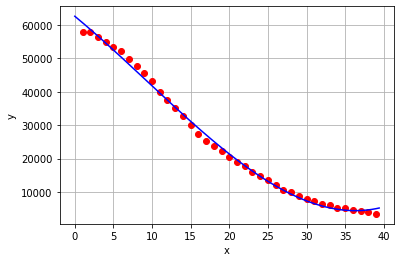

In [137]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

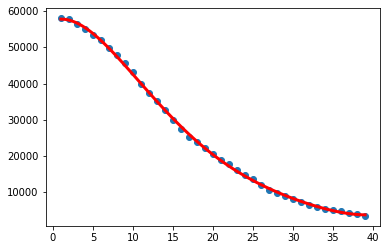

In [138]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, 39, 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [139]:
print (regpoly)

          5          4         3         2
0.003352 x - 0.4173 x + 19.55 x - 381.1 x + 754.9 x + 5.738e+04


In [140]:
print(r2_score(y, regpoly(x)))

0.999672237446161


**Selesai**

### Total Death

- Start: 22-Jan-2020
- End: 26-Mar-2020
- Range: 65 Days

**Data**

In [90]:
y = np.array ((17, 25, 41, 56, 80, 106, 132, 170, 213, 259, 304, 361, 425, 490, 563, 636, 722, 811, 908, 1016, 1113, 1259, 1380, 1523, 1665, 1770, 1868, 2004, 2118, 2236, 2345, 2442, 2592, 2663, 2715, 2744, 2788, 2835, 2870, 2912, 2943, 2981, 3012, 3042, 3070, 3097, 3119, 3136, 3158, 3169, 3176, 3189, 3199, 3213, 3226, 3237, 3245, 3248, 3255, 3261, 3270, 3277, 3281, 3287, 3292))
y = y.astype('float64')
y

array([  17.,   25.,   41.,   56.,   80.,  106.,  132.,  170.,  213.,
        259.,  304.,  361.,  425.,  490.,  563.,  636.,  722.,  811.,
        908., 1016., 1113., 1259., 1380., 1523., 1665., 1770., 1868.,
       2004., 2118., 2236., 2345., 2442., 2592., 2663., 2715., 2744.,
       2788., 2835., 2870., 2912., 2943., 2981., 3012., 3042., 3070.,
       3097., 3119., 3136., 3158., 3169., 3176., 3189., 3199., 3213.,
       3226., 3237., 3245., 3248., 3255., 3261., 3270., 3277., 3281.,
       3287., 3292.])

In [91]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

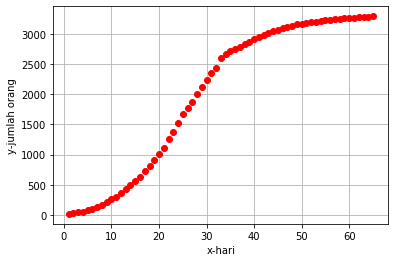

In [92]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

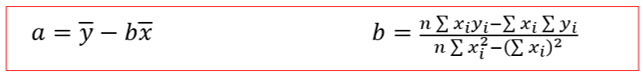

 **Membuat xreg untuk plotting selanjutnya**

In [93]:
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')

<b>Menghitung regresi linear</b>

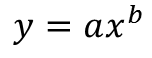

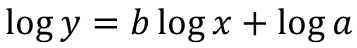

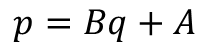

In [94]:
p = np.log10(y)
q = np.log10(x)
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [95]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 1.4840q + 1.0116


**Hitung kembali dalam bentuk bilangan berpangkat**

In [96]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 10.2707x^(1.4840)


**Hitung Koefisien Korelasi [r-square]**

In [97]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9833 dan r^2 = 0.9668


**Plot data dan perbandingan dengan hasil regresinya**

In [98]:
yreg = a*(xreg**b)

Text(0, 0.5, 'banyak kasus aktif')

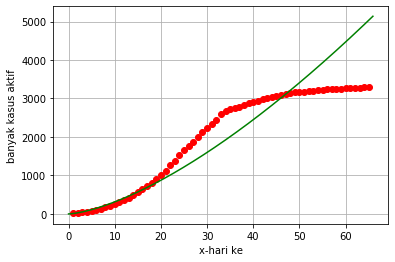

In [99]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('banyak kasus aktif')

**Selesai**

#### Regresi Eksponensial

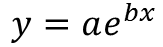

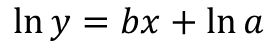

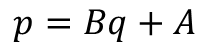

**Linearisasi**

In [100]:
y = np.array([17, 25, 41, 56, 80, 106, 132, 170, 213, 259, 304, 361, 425, 490, 563, 636, 722, 811, 908, 1016, 1113, 1259, 1380, 1523, 1665, 1770, 1868, 2004, 2118, 2236, 2345, 2442, 2592, 2663, 2715, 2774, 2788, 2835, 2870, 2912, 2943, 2981, 3012, 3042, 3070, 3097, 3119, 3136, 3158, 3169, 3176, 3189, 3199, 3213, 3226, 3237, 3245, 3248, 3255, 3261, 3270, 3277, 3281, 3287, 3292])
y = y.astype('float64')
y

array([  17.,   25.,   41.,   56.,   80.,  106.,  132.,  170.,  213.,
        259.,  304.,  361.,  425.,  490.,  563.,  636.,  722.,  811.,
        908., 1016., 1113., 1259., 1380., 1523., 1665., 1770., 1868.,
       2004., 2118., 2236., 2345., 2442., 2592., 2663., 2715., 2774.,
       2788., 2835., 2870., 2912., 2943., 2981., 3012., 3042., 3070.,
       3097., 3119., 3136., 3158., 3169., 3176., 3189., 3199., 3213.,
       3226., 3237., 3245., 3248., 3255., 3261., 3270., 3277., 3281.,
       3287., 3292.])

In [101]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.])

In [102]:
p = np.log(y)
q = x

**Hitung regresi linear**

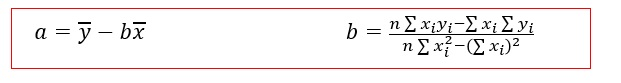

In [103]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [104]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.0614q + 5.0834


**Hitung kembali dalam bentuk bilangan berpangkat**

In [105]:
a = np.e**A
b = B

In [106]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 161.3146x^(0.0614)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [107]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.8491 dan r^2 = 0.7209


**Plot data dan regresinya**

In [108]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [109]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([ 161.31456951,  162.30772849,  163.30700201,  164.31242773,
        165.3240435 ,  166.34188745,  167.36599792,  168.39641349,
        169.43317298,  170.47631544,  171.52588018,  172.58190673,
        173.64443488,  174.71350465,  175.78915633,  176.87143042,
        177.96036771,  179.05600921,  180.15839621,  181.26757023,
        182.38357305,  183.50644673,  184.63623356,  185.7729761 ,
        186.91671718,  188.06749988,  189.22536757,  190.39036385,
        191.56253261,  192.74191802,  193.92856451,  195.12251677,
        196.3238198 ,  197.53251884,  198.74865942,  199.97228737,
        201.20344879,  202.44219004,  203.68855781,  204.94259903,
        206.20436097,  207.47389114,  208.75123738,  210.0364478 ,
        211.32957083,  212.63065518,  213.93974986,  215.25690419,
        216.58216779,  217.9155906 ,  219.25722283,  220.60711504,
        221.96531807,  223.3318831 ,  224.7068616 ,  226.09030538,
        227.48226656,  228.88279756,  230.29195116,  231.70978

Text(0, 0.5, 'y-banyak orang')

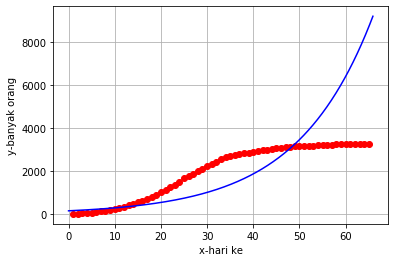

In [110]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [111]:
y = np.array ((17, 25, 41, 56, 80, 106, 132, 170, 213, 259, 304, 361, 425, 490, 563, 636, 722, 811, 908, 1016, 1113, 1259, 1380, 1523, 1665, 1770, 1868, 2004, 2118, 2236, 2345, 2442, 2592, 2663, 2715, 2744, 2788, 2835, 2870, 2912, 2943, 2981, 3012, 3042, 3070, 3097, 3119, 3136, 3158, 3169, 3176, 3189, 3199, 3213, 3226, 3237, 3245, 3248, 3255, 3261, 3270, 3277, 3281, 3287, 3292))
y = y.astype('float64')
y

array([  17.,   25.,   41.,   56.,   80.,  106.,  132.,  170.,  213.,
        259.,  304.,  361.,  425.,  490.,  563.,  636.,  722.,  811.,
        908., 1016., 1113., 1259., 1380., 1523., 1665., 1770., 1868.,
       2004., 2118., 2236., 2345., 2442., 2592., 2663., 2715., 2744.,
       2788., 2835., 2870., 2912., 2943., 2981., 3012., 3042., 3070.,
       3097., 3119., 3136., 3158., 3169., 3176., 3189., 3199., 3213.,
       3226., 3237., 3245., 3248., 3255., 3261., 3270., 3277., 3281.,
       3287., 3292.])

In [112]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.])

**Membentuk regresi polinomial dari matriks**

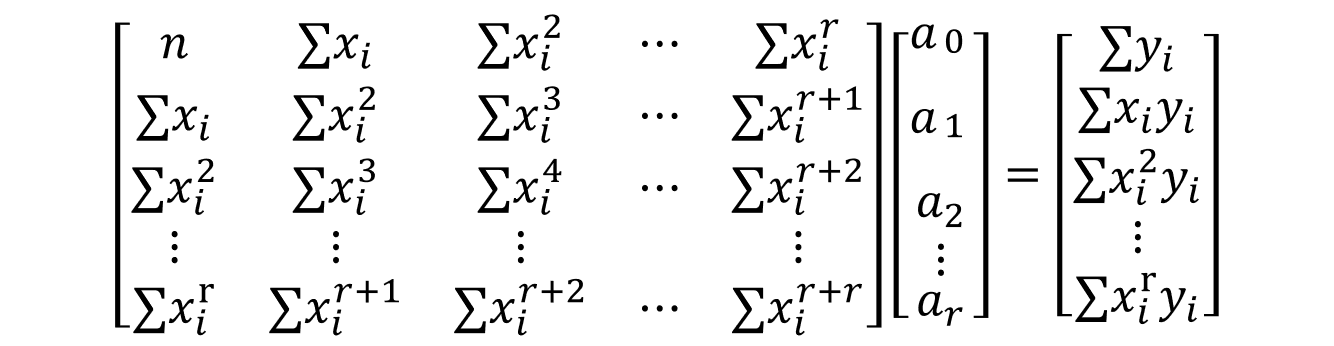

**Mendefinisikan elemen-elemen matriks kiri**

In [113]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[6.50000000e+01, 2.14500000e+03, 9.36650000e+04, 4.60102500e+06],
       [2.14500000e+03, 9.36650000e+04, 4.60102500e+06, 2.41074977e+08],
       [9.36650000e+04, 4.60102500e+06, 2.41074977e+08, 1.31573978e+10],
       [4.60102500e+06, 2.41074977e+08, 1.31573978e+10, 7.38607815e+11]])

**Mendefinisikan elemen-elemen matriks kanan**

In [114]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[1.30560000e+05],
       [5.73790500e+06],
       [2.76864517e+08],
       [1.42038282e+10]])

**Invers matriks sisi kiri**

In [115]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 2.76883197e-01, -3.16881819e-02,  9.67446532e-04,
        -8.61593604e-06],
       [-3.16881819e-02,  4.69496930e-03, -1.59664436e-04,
         1.50922720e-06],
       [ 9.67446532e-04, -1.59664436e-04,  5.77193936e-06,
        -5.67335560e-08],
       [-8.61593604e-06,  1.50922720e-06, -5.67335560e-08,
         5.73066222e-10]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [116]:
Y = Ainv.dot(B)
print(Y)

[[-2.01565299e+02]
 [ 3.34656567e+01]
 [ 2.38197525e+00]
 [-3.28687198e-02]]


In [117]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [118]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = -0.0329x^3 + 2.3820X^2 + 33.4657x + -201.5653


In [119]:
y

array([  17.,   25.,   41.,   56.,   80.,  106.,  132.,  170.,  213.,
        259.,  304.,  361.,  425.,  490.,  563.,  636.,  722.,  811.,
        908., 1016., 1113., 1259., 1380., 1523., 1665., 1770., 1868.,
       2004., 2118., 2236., 2345., 2442., 2592., 2663., 2715., 2744.,
       2788., 2835., 2870., 2912., 2943., 2981., 3012., 3042., 3070.,
       3097., 3119., 3136., 3158., 3169., 3176., 3189., 3199., 3213.,
       3226., 3237., 3245., 3248., 3255., 3261., 3270., 3277., 3281.,
       3287., 3292.])

**Hitung Koefisien Korelasi [r-square] dan hasil regresi**

In [120]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('nilai r-square = ',R2)

nilai r-square =  0.9875493187517915


**Plot**

Text(0, 0.5, 'y')

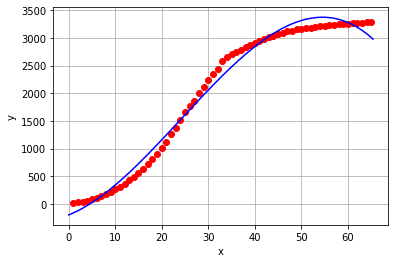

In [121]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

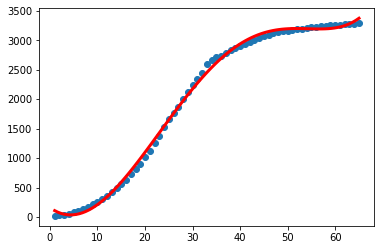

In [122]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, 65, 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [123]:
print (regpoly)

           5             4          3         2
1.299e-05 x - 0.0006754 x - 0.1004 x + 7.483 x - 59.16 x + 158.6


In [124]:
print(r2_score(y, regpoly(x)))

0.9980861672262538


**Selesai**